In [1]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)



In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})car images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [3]:

data_path = "archive/car_data/car_data/train"
os.listdir(data_path)

['Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'AM General Hummer SUV 2000',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'Bentley Arnage Sedan 2009',
 'Bentley Continental Flying Spur Sedan 2007',
 'Bentley Continental GT Coupe 2007',
 'Bentley Continental GT Coupe 2012',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'Bentley Mulsanne Sedan 2011',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',


In [26]:
base_name = 'train'
width = 80

include = {'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'AM General Hummer SUV 2000',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'Bentley Arnage Sedan 2009',
 'Bentley Continental Flying Spur Sedan 2007',
 'Bentley Continental GT Coupe 2007',
 'Bentley Continental GT Coupe 2012',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'Bentley Mulsanne Sedan 2011',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6 SUV 2012',
 'BMW Z4 Convertible 2012',
 'Bugatti Veyron 16.4 Convertible 2009',
 'Bugatti Veyron 16.4 Coupe 2009',
 'Buick Enclave SUV 2012',
 'Buick Rainier SUV 2007',
 'Buick Regal GS 2012',
 'Buick Verano Sedan 2012',
 'Cadillac CTS-V Sedan 2012',
 'Cadillac Escalade EXT Crew Cab 2007',
 'Cadillac SRX SUV 2012',
 'Chevrolet Avalanche Crew Cab 2012',
 'Chevrolet Camaro Convertible 2012',
 'Chevrolet Cobalt SS 2010',
 'Chevrolet Corvette Convertible 2012',
 'Chevrolet Corvette Ron Fellows Edition Z06 2007',
 'Chevrolet Corvette ZR1 2012',
 'Chevrolet Express Cargo Van 2007',
 'Chevrolet Express Van 2007',
 'Chevrolet HHR SS 2010',
 'Chevrolet Impala Sedan 2007',
 'Chevrolet Malibu Hybrid Sedan 2010',
 'Chevrolet Malibu Sedan 2007',
 'Chevrolet Monte Carlo Coupe 2007',
 'Chevrolet Silverado 1500 Classic Extended Cab 2007',
 'Chevrolet Silverado 1500 Extended Cab 2012',
 'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
 'Chevrolet Silverado 1500 Regular Cab 2012',
 'Chevrolet Silverado 2500HD Regular Cab 2012',
 'Chevrolet Sonic Sedan 2012',
 'Chevrolet Tahoe Hybrid SUV 2012',
 'Chevrolet TrailBlazer SS 2009',
 'Chevrolet Traverse SUV 2012',
 'Chrysler 300 SRT-8 2010',
 'Chrysler Aspen SUV 2009',
 'Chrysler Crossfire Convertible 2008',
 'Chrysler PT Cruiser Convertible 2008',
 'Chrysler Sebring Convertible 2010',
 'Chrysler Town and Country Minivan 2012',
 'Daewoo Nubira Wagon 2002',
 'Dodge Caliber Wagon 2007',
 'Dodge Caliber Wagon 2012',
 'Dodge Caravan Minivan 1997',
 'Dodge Challenger SRT8 2011',
 'Dodge Charger Sedan 2012',
 'Dodge Charger SRT-8 2009',
 'Dodge Dakota Club Cab 2007',
 'Dodge Dakota Crew Cab 2010',
 'Dodge Durango SUV 2007',
 'Dodge Durango SUV 2012',
 'Dodge Journey SUV 2012',
 'Dodge Magnum Wagon 2008',
 'Dodge Ram Pickup 3500 Crew Cab 2010',
 'Dodge Ram Pickup 3500 Quad Cab 2009',
 'Dodge Sprinter Cargo Van 2009',
 'Eagle Talon Hatchback 1998',
 'Ferrari 458 Italia Convertible 2012',
 'Ferrari 458 Italia Coupe 2012',
 'Ferrari California Convertible 2012',
 'Ferrari FF Coupe 2012',
 'FIAT 500 Abarth 2012',
 'FIAT 500 Convertible 2012',
 'Fisker Karma Sedan 2012',
 'Ford E-Series Wagon Van 2012',
 'Ford Edge SUV 2012',
 'Ford Expedition EL SUV 2009',
 'Ford F-150 Regular Cab 2007',
 'Ford F-150 Regular Cab 2012',
 'Ford F-450 Super Duty Crew Cab 2012',
 'Ford Fiesta Sedan 2012',
 'Ford Focus Sedan 2007',
 'Ford Freestar Minivan 2007',
 'Ford GT Coupe 2006',
 'Ford Mustang Convertible 2007',
 'Ford Ranger SuperCab 2011',
 'Geo Metro Convertible 1993',
 'GMC Acadia SUV 2012',
 'GMC Canyon Extended Cab 2012',
 'GMC Savana Van 2012',
 'GMC Terrain SUV 2012',
 'GMC Yukon Hybrid SUV 2012',
 'Honda Accord Coupe 2012',
 'Honda Accord Sedan 2012',
 'Honda Odyssey Minivan 2007',
 'Honda Odyssey Minivan 2012',
 'HUMMER H2 SUT Crew Cab 2009',
 'HUMMER H3T Crew Cab 2010',
 'Hyundai Accent Sedan 2012',
 'Hyundai Azera Sedan 2012',
 'Hyundai Elantra Sedan 2007',
 'Hyundai Elantra Touring Hatchback 2012',
 'Hyundai Genesis Sedan 2012',
 'Hyundai Santa Fe SUV 2012',
 'Hyundai Sonata Hybrid Sedan 2012',
 'Hyundai Sonata Sedan 2012',
 'Hyundai Tucson SUV 2012',
 'Hyundai Veloster Hatchback 2012',
 'Hyundai Veracruz SUV 2012',
 'Infiniti G Coupe IPL 2012',
 'Infiniti QX56 SUV 2011',
 'Isuzu Ascender SUV 2008',
 'Jaguar XK XKR 2012',
 'Jeep Compass SUV 2012',
 'Jeep Grand Cherokee SUV 2012',
 'Jeep Liberty SUV 2012',
 'Jeep Patriot SUV 2012',
 'Jeep Wrangler SUV 2012',
 'Lamborghini Aventador Coupe 2012',
 'Lamborghini Diablo Coupe 2001',
 'Lamborghini Gallardo LP 570-4 Superleggera 2012',
 'Lamborghini Reventon Coupe 2008',
 'Land Rover LR2 SUV 2012',
 'Land Rover Range Rover SUV 2012',
 'Lincoln Town Car Sedan 2011',
 'Maybach Landaulet Convertible 2012',
 'Mazda Tribute SUV 2011',
 'McLaren MP4-12C Coupe 2012',
 'Mercedes-Benz 300-Class Convertible 1993',
 'Mercedes-Benz C-Class Sedan 2012',
 'Mercedes-Benz E-Class Sedan 2012',
 'Mercedes-Benz S-Class Sedan 2012',
 'Mercedes-Benz SL-Class Coupe 2009',
 'Mercedes-Benz Sprinter Van 2012',
 'MINI Cooper Roadster Convertible 2012',
 'Mitsubishi Lancer Sedan 2012',
 'Nissan 240SX Coupe 1998',
 'Nissan Juke Hatchback 2012',
 'Nissan Leaf Hatchback 2012',
 'Nissan NV Passenger Van 2012',
 'Plymouth Neon Coupe 1999',
 'Porsche Panamera Sedan 2012',
 'Ram C-V Cargo Van Minivan 2012',
 'Rolls-Royce Ghost Sedan 2012',
 'Rolls-Royce Phantom Drophead Coupe Convertible 2012',
 'Rolls-Royce Phantom Sedan 2012',
 'Scion xD Hatchback 2012',
 'smart fortwo Convertible 2012',
 'Spyker C8 Convertible 2009',
 'Spyker C8 Coupe 2009',
 'Suzuki Aerio Sedan 2007',
 'Suzuki Kizashi Sedan 2012',
 'Suzuki SX4 Hatchback 2012',
 'Suzuki SX4 Sedan 2012',
 'Tesla Model S Sedan 2012',
 'Toyota 4Runner SUV 2012',
 'Toyota Camry Sedan 2012',
 'Toyota Corolla Sedan 2012',
 'Toyota Sequoia SUV 2012',
 'Volkswagen Beetle Hatchback 2012',
 'Volkswagen Golf Hatchback 1991',
 'Volkswagen Golf Hatchback 2012',
 'Volvo 240 Sedan 1993',
 'Volvo C30 Hatchback 2012',
 'Volvo XC90 SUV 2007'}

resize_all(src=data_path, pklname=base_name, width=width, include=include)


Acura Integra Type R 2001
Acura RL Sedan 2012
Acura TL Sedan 2012
Acura TL Type-S 2008
Acura TSX Sedan 2012
Acura ZDX Hatchback 2012
AM General Hummer SUV 2000
Aston Martin V8 Vantage Convertible 2012
Aston Martin V8 Vantage Coupe 2012
Aston Martin Virage Convertible 2012
Aston Martin Virage Coupe 2012
Audi 100 Sedan 1994
Audi 100 Wagon 1994
Audi A5 Coupe 2012
Audi R8 Coupe 2012
Audi RS 4 Convertible 2008
Audi S4 Sedan 2007
Audi S4 Sedan 2012
Audi S5 Convertible 2012
Audi S5 Coupe 2012
Audi S6 Sedan 2011
Audi TT Hatchback 2011
Audi TT RS Coupe 2012
Audi TTS Coupe 2012
Audi V8 Sedan 1994
Bentley Arnage Sedan 2009
Bentley Continental Flying Spur Sedan 2007
Bentley Continental GT Coupe 2007
Bentley Continental GT Coupe 2012
Bentley Continental Supersports Conv. Convertible 2012
Bentley Mulsanne Sedan 2011
BMW 1 Series Convertible 2012
BMW 1 Series Coupe 2012
BMW 3 Series Sedan 2012
BMW 3 Series Wagon 2012
BMW 6 Series Convertible 2007
BMW ActiveHybrid 5 Sedan 2012
BMW M3 Coupe 2012
BMW M5

In [27]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  8144
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
labels: ['AM General Hummer SUV ' 'Acura Integra Type R ' 'Acura RL Sedan '
 'Acura TL Sedan ' 'Acura TL Type-S ' 'Acura TSX Sedan '
 'Acura ZDX Hatchback ' 'Aston Martin V8 Vantage Convertible '
 'Aston Martin V8 Vantage Coupe ' 'Aston Martin Virage Convertible '
 'Aston Martin Virage Coupe ' 'Audi 100 Sedan ' 'Audi 100 Wagon '
 'Audi A5 Coupe ' 'Audi R8 Coupe ' 'Audi RS 4 Convertible '
 'Audi S4 Sedan ' 'Audi S5 Convertible ' 'Audi S5 Coupe ' 'Audi S6 Sedan '
 'Audi TT Hatchback ' 'Audi TT RS Coupe ' 'Audi TTS Coupe '
 'Audi V8 Sedan ' 'BMW 1 Series Convertible ' 'BMW 1 Series Coupe '
 'BMW 3 Series Sedan ' 'BMW 3 Series Wagon ' 'BMW 6 Series Convertible '
 'BMW ActiveHybrid 5 Sedan ' 'BMW M3 Coupe ' 'BMW M5 Sedan '
 'BMW M6 Convertible ' 'BMW X3 SUV ' 'BMW X5 SUV ' 'BMW X6 SUV '
 'BMW Z4 Convertible ' 'Bentley Arnage Sedan '
 'Bentley Continental Flying Spur

Counter({'Acura Integra Type R ': 45,
         'Acura RL Sedan ': 32,
         'Acura TL Sedan ': 43,
         'Acura TL Type-S ': 42,
         'Acura TSX Sedan ': 41,
         'Acura ZDX Hatchback ': 39,
         'AM General Hummer SUV ': 45,
         'Aston Martin V8 Vantage Convertible ': 45,
         'Aston Martin V8 Vantage Coupe ': 41,
         'Aston Martin Virage Convertible ': 33,
         'Aston Martin Virage Coupe ': 38,
         'Audi 100 Sedan ': 41,
         'Audi 100 Wagon ': 43,
         'Audi A5 Coupe ': 41,
         'Audi R8 Coupe ': 43,
         'Audi RS 4 Convertible ': 37,
         'Audi S4 Sedan ': 85,
         'Audi S5 Convertible ': 42,
         'Audi S5 Coupe ': 43,
         'Audi S6 Sedan ': 46,
         'Audi TT Hatchback ': 41,
         'Audi TT RS Coupe ': 40,
         'Audi TTS Coupe ': 43,
         'Audi V8 Sedan ': 44,
         'Bentley Arnage Sedan ': 39,
         'Bentley Continental Flying Spur Sedan ': 45,
         'Bentley Continental GT Coupe ': 81

C:\Users\aatmc\AppData\Local\Temp/ipykernel_12716/3807218959.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


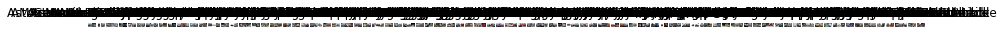

In [28]:

labels = np.unique(data['label'])
 

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
 

for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [46]:
X = np.array(data['data'])
X = list.copy(data['data'])
y = np.array(data['label'])

C:\Users\aatmc\AppData\Local\Temp/ipykernel_12716/3681909346.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array(data['data'])


ValueError: could not broadcast input array from shape (80,80,3) into shape (80,80)

In [57]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

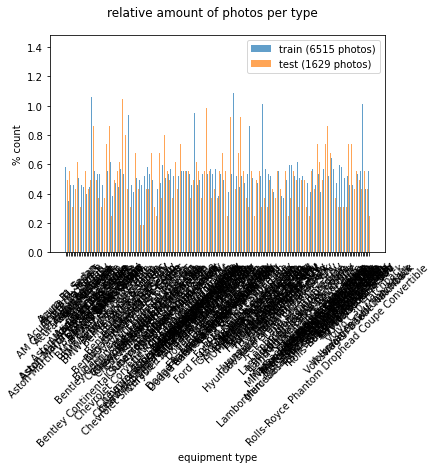

In [58]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [59]:
#Processing Section

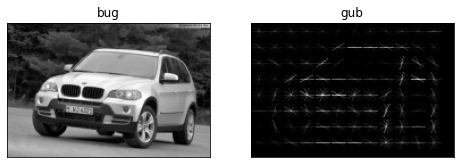

In [60]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
bug = imread('archive/car_data/car_data/train/BMW X5 SUV 2007/00366.jpg',
             as_gray=True)

 

bug = rescale(bug, 1/3, mode='reflect')

bug_hog, bug_hog_img = hog(
    bug, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)

[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(bug, cmap='gray')
ax[0].set_title('bug')
ax[1].imshow(bug_hog_img, cmap='gray')
ax[1].set_title('gub')
plt.show()

In [61]:
print('number of pixels: ', bug.shape[0] * bug.shape[1])
print('number of hog features: ', bug_hog.shape[0])

number of pixels:  21122
number of hog features:  2772


In [62]:
#Transformers Section

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
   
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        
        return self
 
    def transform(self, X, y=None):
        
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
   
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: 
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 

grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 

X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

C:\Users\aatmc\AppData\Local\Temp/ipykernel_12716/3283533736.py:15: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X])


(6515, 576)


In [65]:
#Training Section

In [66]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [67]:


X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

C:\Users\aatmc\AppData\Local\Temp/ipykernel_12716/3283533736.py:15: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  return np.array([skimage.color.rgb2gray(img) for img in X])


In [68]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True]

Percentage correct:  3.560466543891958


In [43]:
#confusion Matrix Section

In [44]:
import pandas as pd

In [45]:
labels = y_test
predictions = y_pred
 
# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

,true_label,prediction
0,Spyker C8 Convertible,Cadillac CTS-V Sedan
1,Audi 100 Sedan,BMW 1 Series Coupe
2,Suzuki SX4 Hatchback,Acura TL Type-S
3,Ford Edge SUV,Buick Verano Sedan
4,Dodge Ram Pickup 3500 Crew Cab,Dodge Durango SUV
...,...,...
1624,Toyota Corolla Sedan,Dodge Durango SUV
1625,McLaren MP4-12C Coupe,Nissan Leaf Hatchback
1626,Volvo C30 Hatchback,Volvo 240 Sedan
1627,Chevrolet Silverado 1500 Regular Cab,Volkswagen Golf Hatchback


In [48]:
print(y)

['Acura Integra Type R ' 'Acura Integra Type R ' 'Acura Integra Type R '
 ... 'Volvo XC90 SUV ' 'Volvo XC90 SUV ' 'Volvo XC90 SUV ']


In [53]:
print(X[1110])

[[[0.56573529 0.60044118 0.66710784]
  [0.56181373 0.58926471 0.65416667]
  [0.56181373 0.58534314 0.64297794]
  ...
  [0.98627451 0.98627451 0.98802696]
  [0.98254902 0.98254902 0.98254902]
  [0.98098039 0.98098039 0.98098039]]

 [[0.50656863 0.54186275 0.60852941]
  [0.49539216 0.525      0.5877451 ]
  [0.47920343 0.50371324 0.56191176]
  ...
  [0.89192402 0.89192402 0.89941176]
  [0.92088971 0.92088971 0.92088971]
  [0.97159069 0.97159069 0.97159069]]

 [[0.36577206 0.40088235 0.46754902]
  [0.36671569 0.39753676 0.46028186]
  [0.3846201  0.40845588 0.46703431]
  ...
  [0.69626225 0.69264706 0.70343137]
  [0.83795343 0.83795343 0.83795343]
  [0.966875   0.966875   0.966875  ]]

 ...

 [[0.99338235 0.99338235 0.99338235]
  [0.99338235 0.99338235 0.99338235]
  [0.99068627 0.99068627 0.99068627]
  ...
  [0.98872549 0.98872549 0.98872549]
  [0.98376225 0.98376225 0.98376225]
  [0.98823529 0.98823529 0.98823529]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]


In [54]:
print(data['data'][1110])

[[[0.56573529 0.60044118 0.66710784]
  [0.56181373 0.58926471 0.65416667]
  [0.56181373 0.58534314 0.64297794]
  ...
  [0.98627451 0.98627451 0.98802696]
  [0.98254902 0.98254902 0.98254902]
  [0.98098039 0.98098039 0.98098039]]

 [[0.50656863 0.54186275 0.60852941]
  [0.49539216 0.525      0.5877451 ]
  [0.47920343 0.50371324 0.56191176]
  ...
  [0.89192402 0.89192402 0.89941176]
  [0.92088971 0.92088971 0.92088971]
  [0.97159069 0.97159069 0.97159069]]

 [[0.36577206 0.40088235 0.46754902]
  [0.36671569 0.39753676 0.46028186]
  [0.3846201  0.40845588 0.46703431]
  ...
  [0.69626225 0.69264706 0.70343137]
  [0.83795343 0.83795343 0.83795343]
  [0.966875   0.966875   0.966875  ]]

 ...

 [[0.99338235 0.99338235 0.99338235]
  [0.99338235 0.99338235 0.99338235]
  [0.99068627 0.99068627 0.99068627]
  ...
  [0.98872549 0.98872549 0.98872549]
  [0.98376225 0.98376225 0.98376225]
  [0.98823529 0.98823529 0.98823529]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]


In [55]:
print(len(X))

8144


In [56]:
print(len(data['data']))

8144
